<a href="https://colab.research.google.com/github/LuisOtavioPessoa/versoclassico/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install flask nltk

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


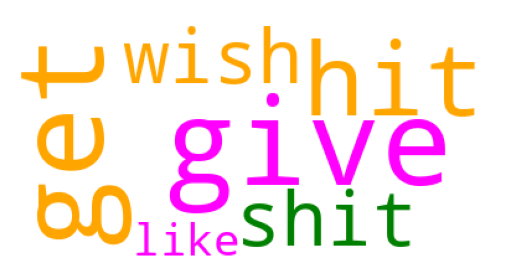

In [21]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stops = set(stopwords.words('english'))

def obter_poesias(palavra):
    rimas = []
    for syn in wordnet.synsets(palavra):
        for lemma in syn.lemmas():
            rima = lemma.name().lower()
            if rima != palavra:
                rimas.append(rima)
    return list(set(rimas))

def encontrar_rimas_no_poema(poema):
    palavras_poema = word_tokenize(poema)
    rimas_poema = {}
    for palavra in palavras_poema:
        rimas = obter_poesias(palavra)
        rimas_validas = [rima for rima in rimas if rima in palavras_poema]
        rimas_poema[palavra] = rimas_validas
    return rimas_poema

def gerar_nuvem_palavras_rimadas(poema):
    rimas_poema = encontrar_rimas_no_poema(poema)
    palavras_rimadas = [rima for rimas in rimas_poema.values() for rima in rimas]
    texto_rimado = ' '.join(palavras_rimadas)

    mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])
    nuvem = WordCloud(background_color='white',
                      colormap=mapa_cores,
                      stopwords=stops,
                     )

    nuvem.generate(texto_rimado)
    plt.imshow(nuvem)
    plt.axis('off')
    plt.show()

# Exemplo de uso
poema = "Woo, made this here with all the ice on in the booth At the gate outside, when they pull up, they get me loose Yeah, Jump Out boys, that's Nike boys, hoppin' out coupes This shit way too big, when we pull up give me the loot (Gimme the loot!) Was off the Remy, had a Papoose Had to hit my old town to duck the news Two-four hour lockdown, we made no moves Now it's 4AM and I'm back up poppin' with the crew I just landed in, Chase B mixes pop like Jamba Juice Different colored chains, think my jeweler really sellin' fruits And they chokin', man, know the crackers wish it was a noose"
gerar_nuvem_palavras_rimadas(poema)
